In [98]:
import pickle
import sys
from Preprocessing import remove_punctuations
from Preprocessing import remove_stopwords
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import itertools
from sklearn.metrics import classification_report

In [99]:
with open('Models/classifier.pkl', 'rb') as f:
    clf = pickle.load(f)
    
with open('Models/vectorizer.pkl', 'rb') as g:
    vectorizer = pickle.load(g)
    
with open('Models/lsa.pkl', 'rb') as h:
    lsa = pickle.load(h)
        

In [100]:
df = pd.read_csv('Evaluating_Dataset/dataset_1_no_stop.csv')
#dataset_2_no_stop.csv

X,y = df['tweet'],df['label']
print X.shape, y.shape

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 45)

(100,) (100,)


In [101]:
X = vectorizer.transform(X)
tfidf_train = X.toarray()
lsa_train = lsa.transform(X)
final_representation = np.concatenate((tfidf_train,lsa_train),axis=1)

In [102]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [103]:
clf.partial_fit(final_representation,y_encoded)

SGDClassifier(alpha=0.0001, average=False,
       class_weight={1: 1.3945615982241952}, epsilon=0.1, eta0=0.0,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='hinge', n_iter=5, n_jobs=1, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

# TESTING

In [104]:
df = pd.read_csv('Evaluating_Dataset/Test_Dataset.csv')
X_test,y_test = df['tweet'],df['label']
print X.shape, y.shape

(100, 3110) (100,)


In [105]:
X2 = vectorizer.transform(X_test)
tfidf_test = X2.toarray()
lsa_test = lsa.transform(X2)

In [106]:
test_final_representation = np.concatenate((tfidf_test,lsa_test),axis=1)
accuracy = clf.score(test_final_representation,y_test) *100
prediction = clf.predict(test_final_representation)
print prediction
print accuracy

[0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0
 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0
 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1
 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 

In [107]:
print "F-Score: ",f1_score(y_test,prediction, average=None)
print "Confusion Matrix: "
print confusion_matrix(y_test,prediction)

F-Score:  [ 0.74  0.63]
Confusion Matrix: 
[[329 157]
 [ 73 195]]


Confusion matrix, without normalization
[[329 157]
 [ 73 195]]
Normalized confusion matrix
[[ 0.68  0.32]
 [ 0.27  0.73]]


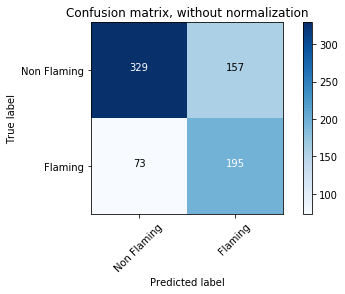

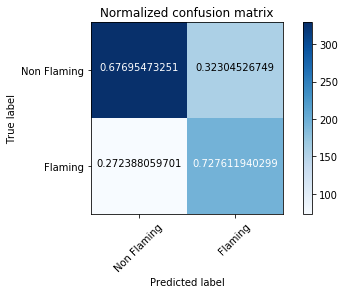

In [108]:
class_names = ['Non Flaming', 'Flaming']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [109]:
print "Classification Report: "
print(classification_report(y_test, prediction))

Classification Report: 
             precision    recall  f1-score   support

          0       0.82      0.68      0.74       486
          1       0.55      0.73      0.63       268

avg / total       0.72      0.69      0.70       754



In [110]:
# # save to pickle
# import pickle

# with open('Models/classifier.pkl', 'wb') as f:
#     pickle.dump(clf, f)